In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\sales_data_Cleaned.csv")

In [16]:
df['Location'].value_counts()

Location
L04    135272
L07     87870
L03     80750
L01     65031
L10     31554
L05     27733
L06     25590
L08     19555
L02     12930
L09      8535
Name: count, dtype: int64

In [17]:
df.sample(10)

,ProductID,Location,Date,UnitsSold,PromoCodeUsed
244835,P0426,L01,2024-10-06,0,No
370282,P0360,L03,2024-09-22,1,No
633,P0495,L03,2024-03-31,7,No
385506,P0262,L02,2024-10-19,3,No
286692,P0458,L04,2024-05-17,6,Yes
471684,P0028,L03,2024-09-06,6,Yes
472218,P0365,L01,2024-04-03,6,No
176285,P0426,L01,2024-03-01,4,No
163930,P0421,L04,2024-05-03,6,No
81700,P0461,L01,2024-05-16,9,No


# Univariate Analysis

# PromoCode Used – Countplot

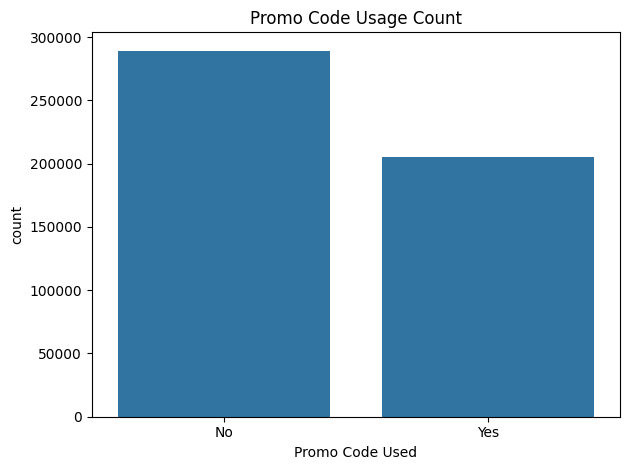

In [18]:
sns.countplot(data=df, x='PromoCodeUsed')
plt.title("Promo Code Usage Count")
plt.xlabel("Promo Code Used")
plt.tight_layout()
plt.show()


#  Location-wise Order Count

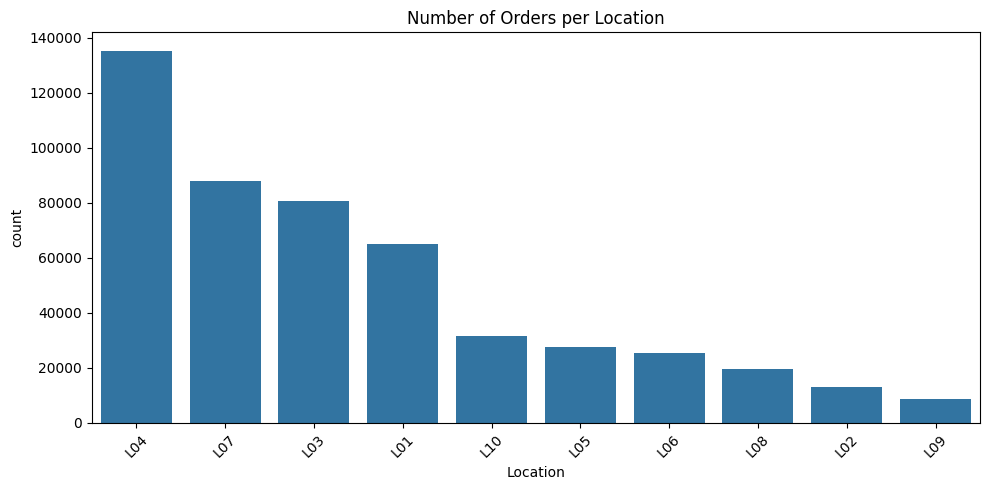

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title("Number of Orders per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
